## Домашнее задание №8

1. Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [75]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris, make_blobs
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

In [76]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=1)

In [77]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
X_train[:3], X_test[:3]

(array([[-1.18101089,  0.90797029, -1.20803289, -1.25674511],
        [-0.0435331 , -1.24248566,  0.77724136,  1.07803365],
        [ 0.71478542, -0.76460656,  0.71885094,  0.81861379]]),
 array([[ 0.08285332,  2.34160759, -1.44159457, -1.25674511],
        [-0.80185162, -1.24248566, -0.39056703, -0.08935573],
        [ 1.09394469, -0.04778791,  0.42689884,  0.29977406]]))

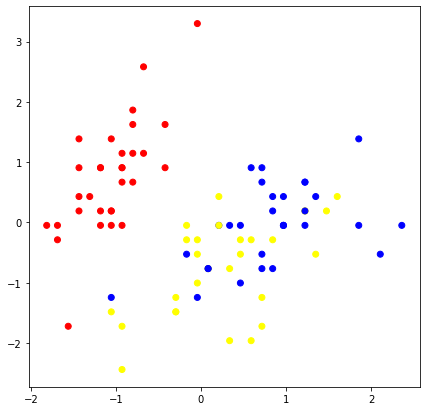

In [78]:
cmap = ListedColormap(['red', 'yellow', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)

In [136]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [137]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Качество классификации по отложенной выборке до применения PCA

In [117]:
k_list = np.arange(1, 31)

f1_list = []
for k in k_list:
    y_pred = knn(X_train, y_train, X_test, k)
    f1 = f1_score(y_pred, y_test, average='macro')
    f1_list.append(f1)
#     print(f'F1-мера алгоритма при k = {k}: {f1:.3f}')

In [118]:
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)

Качество классификации по отложенной выборке с применением PCA (n_components=2)

In [119]:
X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)

In [147]:
X_train_pca_2[:3], X_test_pca_2[:3]

(array([[-2.25255002,  0.40454353],
        [ 1.31574385, -1.09795452],
        [ 1.43626231, -0.44497645]]),
 array([[-2.02604796,  2.13582713],
        [-0.43641236, -1.42804009],
        [ 1.01711392,  0.30143467]]))

In [120]:
f1_list_pca_2 = []
for k in k_list:
    y_pred = knn(X_train_pca_2, y_train, X_test_pca_2, k)
    f1 = f1_score(y_pred, y_test, average='macro')
    f1_list_pca_2.append(f1)
#     print(f'F1-мера алгоритма при k = {k}: {f1:.3f}')

Качество классификации по отложенной выборке с применением PCA (n_components=3)

In [121]:
X_train_pca_3 = pca_3.fit_transform(X_train)
X_test_pca_3 = pca_3.transform(X_test)

In [148]:
X_train_pca_3[:3], X_test_pca_3[:3]

(array([[-2.25255002,  0.40454353,  0.08046767],
        [ 1.31574385, -1.09795452,  0.60510263],
        [ 1.43626231, -0.44497645, -0.05174437]]),
 array([[-2.02604796,  2.13582713, -0.65826071],
        [-0.43641236, -1.42804009,  0.27322507],
        [ 1.01711392,  0.30143467, -0.57898598]]))

In [122]:
f1_list_pca_3 = []
for k in k_list:
    y_pred = knn(X_train_pca_3, y_train, X_test_pca_3, k)
    f1 = f1_score(y_pred, y_test, average='macro')
    f1_list_pca_3.append(f1)
#     print(f'F1-мера алгоритма при k = {k}: {f1:.3f}')

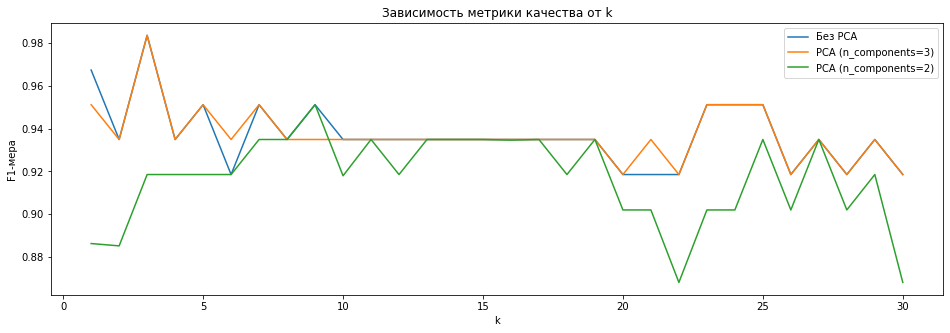

In [123]:
plt.figure(figsize = (16,5))
plt.plot(k_list, f1_list, label = 'Без PCA')
plt.plot(k_list, f1_list_pca_3, label = 'PCA (n_components=3)')
plt.plot(k_list, f1_list_pca_2, label = 'PCA (n_components=2)')
plt.legend()
plt.title('Зависимость метрики качества от k')
plt.xlabel('k')
plt.ylabel('F1-мера')
plt.show()

2. Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [139]:
def svd_fit_transform(X, d):
    U, D, V = np.linalg.svd(X)
    max_indx = []
    for i in range(d):
        indx = np.argmax(D)
        max_indx.append(indx)
        D = np.delete(D, indx)
    W = V[:, max_indx]
    X_ = X @ W
    return X_, W

In [140]:
def svd_transform(X, W):
    X_ = X @ W
    return X_

In [141]:
n_components = 3
X_train_svd_3, W_svd = svd_fit_transform(X_train, n_components)
X_test_svd_3 = svd_transform(X_test, W_svd)

In [149]:
X_train_svd_3[:3], X_test_svd_3[:3]

(array([[-2.12150558, -2.12150558, -2.12150558],
        [ 1.19305639,  1.19305639,  1.19305639],
        [ 1.35183897,  1.35183897,  1.35183897]]),
 array([[-2.03525534, -2.03525534, -2.03525534],
        [-0.38530752, -0.38530752, -0.38530752],
        [ 0.99698926,  0.99698926,  0.99698926]]))

In [143]:
f1_list_svd_3 = []
for k in k_list:
    y_pred = knn(X_train_svd_3, y_train, X_test_svd_3, k)
    f1 = f1_score(y_pred, y_test, average='macro')
    f1_list_svd_3.append(f1)

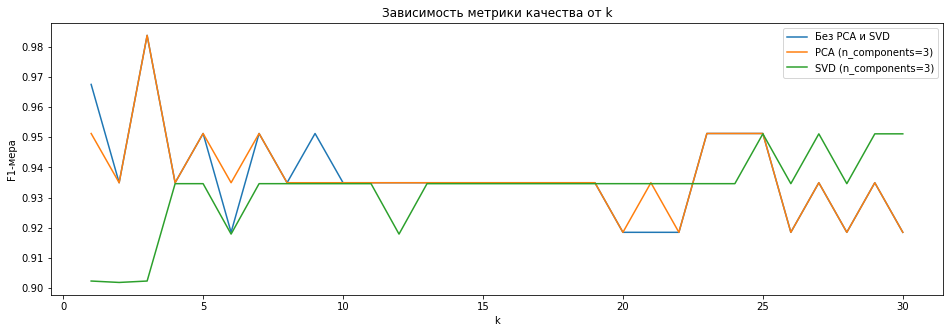

In [144]:
plt.figure(figsize = (16,5))
plt.plot(k_list, f1_list, label = 'Без PCA и SVD')
plt.plot(k_list, f1_list_pca_3, label = 'PCA (n_components=3)')
plt.plot(k_list, f1_list_svd_3, label = 'SVD (n_components=3)')
plt.legend()
plt.title('Зависимость метрики качества от k')
plt.xlabel('k')
plt.ylabel('F1-мера')
plt.show()